<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Diego Gonzalez Hernandez</h2>
<h3 style="font-size: 24px; text-align: center;">Spring 2025</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 8

## Problem 1

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

#### In many problems in scientific as well as non-scientific fields, we often need to measure the positions of objects to understand their properties (e.g. positions of stars in the sky, of particles in the lab, of sports players on the field, etc.). In this problem, we will take a look at a simple toy example of measuring the 2D positions of two particles. 

Assume we have two particles located at 

(x1, y1)=(0, 0) and (x2, y2)=(3, 4)

In reality we cannot measure these perfectly and have measurement uncertainties. 

Assume that these uncertainties follow a gaussian distribution centered at 0 with a standard deviation of 0.1: $\mathcal{N}$($\mu = 0$, $\sigma=0.1$). i.e. for each mock measurement, you will draw a random value from this gaussian distribution and use it as the "noise", and add it to the true positions given above. 

(a). Generate 100 measurements each for the positions (x1, y1) and (x2, y2), with the uncertainties drawn from the gaussian distribution $\mathcal{N}$($\mu = 0$, $\sigma=0.1$) for each measurement of x or y. Plot a histogram of your mock measurements for one of the four quantities: x1, y1, x2, or y2.

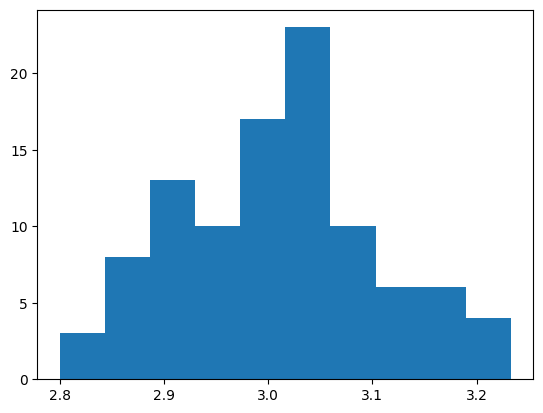

In [8]:
# part a

# Generate 100 noise realizations for each measurement
# We can create them all at once, and add to them our "true" locations
x1_arr = 0 + np.random.normal(0,0.1,size=(100))
x2_arr = 3 + np.random.normal(0,0.1,size=(100))
y1_arr = 0 + np.random.normal(0,0.1,size=(100))
y2_arr = 4 + np.random.normal(0,0.1,size=(100))

plt.hist(x2_arr)
plt.show()


(b). Calculate the separation between the two particles, ($\Delta x$, $\Delta y$) for every pair of 2D position measurements for the two particles, save it in a new array with 100 separations. Calculate the mean and the 68% confidence interval of the separations. Use ```numpy.percentile(data_array, percentile_number)``` to calculate your confidence interval.

In [3]:
# part b

# Calculate the separations between all 100 realizations
dx_arr = x2_arr - x1_arr 
dy_arr = y2_arr - y1_arr

# Find the mean separations
mean_dx = dx_arr.mean()
mean_dy = dy_arr.mean()

# Calculate the 68% confidence interval for the separations
dx_16th = np.percentile(dx_arr,16)
dx_84th = np.percentile(dx_arr,84)

dy_16th = np.percentile(dy_arr,16)
dy_84th = np.percentile(dy_arr,84)

print(f"The separation between the x positions is {mean_dx.round(4)} " + 
      f"with a 68% confidence interval of: {dx_16th.round(4)} - {dx_84th.round(4)}")

print(f"The separation between the y positions is {mean_dy.round(4)} " + 
      f"with a 68% confidence interval of: {dy_16th.round(4)} - {dy_84th.round(4)}")

The separation between the x positions is 3.0058 with a 68% confidence interval of: 2.8592 - 3.1297
The separation between the y positions is 4.0098 with a 68% confidence interval of: 3.8539 - 4.1565


(c). Calculate the distance $\rho = \sqrt{\Delta x^2 + \Delta y^2}$ and save it in another array of size 100. Calculate the mean and 68% confidence interval of the distance. What is the absolute error of the mean relative to the true value: $\rho_{true} = \sqrt{3^2 + 4^2} = 5$? This error is much smaller than the 68% interval for the distribution, why is that? is it just by chance our result is so precise?

In [4]:
# part c

# Repeat part b but with a radial separation
rho = np.sqrt(dx_arr**2 + dy_arr**2)

mean_rho = rho.mean()

rho_16th = np.percentile(rho,16)
rho_84th = np.percentile(rho,84)

print(f"The separation between the two positions is {mean_rho.round(4)} " + 
      f"with a 68% confidence interval of: {rho_16th.round(4)} - {rho_84th.round(4)}")

# Now, find the difference in true value and mean value,
# and compare to our 68% confidence interval
rho_abs_err = np.abs(5-mean_rho)

rho_meas_err = (rho_84th-rho_16th)/2

print(f"The absolute error is {rho_abs_err.round(4)}, compared to the measured error of {rho_meas_err.round(4)}. " +
     f"This is a factor of {(rho_meas_err/rho_abs_err).round(4)} difference.")


The separation between the two positions is 5.0134 with a 68% confidence interval of: 4.8716 - 5.1374
The absolute error is 0.0134, compared to the measured error of 0.1329. This is a factor of 9.9178 difference.


(d). Now, multiply your absolute error by $\sqrt{100}$, and then compare to the interval again. You are more likely to find that they are now on the same order of magnitude. This shows the difference between the uncertainty of the distribution a single data point is drawn from, and the "uncertainty of the mean", where the mean value benefits from making repeated measurements of the same quantity and becomes more precise as the number of measurements increases. 

For independent measurements, each measurement is then like a new random variable. The mean is the sum of these independent variables divided by the number of measurements: 
$$\overline{x} = \frac{1}{N} (x_1 + x_2 + ... + x_N)$$



In [5]:
# part d

#    Absolute error times sqrt(N);    Measured Error;     Ratio of the two
print(rho_abs_err*np.sqrt(100), rho_meas_err, rho_abs_err*np.sqrt(100)/rho_meas_err)


0.13402480562923813 0.13292343358154834 1.008285762848686



(e). Prove that the standard deviation of the mean satisfies: $\sigma_{\overline{x}}$ = $\frac{1}{\sqrt{N}} \sigma_{\bar{x}}$, (Latex isn't working properly, but the left sigma should be sigma_xbar, and the right sigma is just sigma_x) where N is the number of independent measurements, and all $x_{i}$ have the same standard deviation: $\sigma_{x} = \sigma_{x_i}$. 

You can use Pen and Paper for this.

Proof:
\begin{align}
\overline{x} &= \frac{1}{N} \sum^N_{i=1} x_i \\
Var(\overline{x}) &= Var(\frac{1}{N} \sum^N_{i=1} x_i) \\
Var(\overline{x}) &= \frac{1}{N^2} Var(\sum^N_{i=1} x_i) \\
Var(\overline{x}) &= \frac{1}{N^2} \sum^N_{i=1} Var(x_i)\\
Var(\overline{x}) &= \frac{N}{N^2} Var(x)\\
Var(\overline{x}) &= \frac{1}{N}Var(x) \\ 
\sigma_{\overline{x}} &= \frac{1}{\sqrt{N}} \sigma_{x}
\end{align}